# Quickstart of SuPy

**Dr Ting Sun** (ting.sun@reading.ac.uk)

*2018 Autumn*


This quickstart demonstrates the essential and simplest workflow of `supy` in [SUEWS](https://suews-docs.readthedocs.io/) simulation:

1. [load SUEWS input files](#Load-SUEWS-input-files)
2. [run SUEWS simulation](#Run-SUEWS-simulations)
3. [examine SUEWS results](#Examine-SUEWS-results)


Before start, we need to **install** and **load** the following necessary packages.

In [1]:
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path

## Load SUEWS input files

First, a path to SUEWS `RunControl.nml` should be specified, which will direct `supy` to locate input files.

In [2]:
path_runcontrol=Path('..')/'data'/'sample_run'/'RunControl.nml'

### Model configuration

We call `sp.init_SUEWS_pd` to initialise a SUEWS simulation and get two `pandas` objects (note: the following names CAN be customised and are NOT fixed to the examples shown here):

1. `ser_mod_cfg`: a `Series` for model-wide specifications
2. `df_state_init`: a `DataFrame` for grid-specific settings

Once loaded in, these objects CAN be modified and reused for conducting simulations that differ from the one configured via input files under the above `dir_start`.

In [3]:
ser_mod_cfg, df_state_init = sp.init_SUEWS_pd(path_runcontrol)

A sample `ser_mod_cfg` looks like below:

In [4]:
ser_mod_cfg

year                     [2012.0, 2013.0]
nrow                                    1
resolutionfilesin                    3600
ncol                                    1
keeptstepfilesin                        0
waterdepth                          20000
resolutionfilesout                   3600
disaggmethod                            1
filecode                               Kc
multipleestmfiles                       0
raindisaggmethod                      100
cbluse                                  0
fileoutputpath                  ./Output/
kdownzen                                0
multiplemetfiles                        0
writeoutoption                          2
multipleinitfiles                       0
ncmode                                  0
disaggmethodestm                        1
resolutionfilesinestm                3600
solweiguse                              0
fileinputpath                    ./Input/
keeptstepfilesout                       0
suppresswarnings                  

A sample `df_state_init` looks below (note that `.T` is used here to a nicer tableform view):

In [5]:
df_state_init.filter(like='method').T

grid,1
aerodynamicresistancemethod,2
emissionsmethod,2
evapmethod,2
netradiationmethod,3
roughlenheatmethod,2
roughlenmommethod,2
smdmethod,0
stabilitymethod,3
storageheatmethod,1
waterusemethod,0


### Meteorological forcing

Following the convention of SUEWS, `supy` loads meteorological forcing (met-forcing) files at the grid level.

<div class="alert alert-info">

**Note:** 
    
    If `multiplemetfiles = 0` (i.e., all grids use the same met-forcing file) is set in `ser_mod_cfg`, the `grid` argument takes NO effect and is ignored by `supy`.

</div>

In [6]:
grid = df_state_init.index[0]
df_forcing = sp.load_SUEWS_Forcing_df_grid(path_runcontrol, grid)

## Run SUEWS simulations

Once met-forcing (via `df_forcing`) and initial conditions (via `df_state_init`) are loaded in, we call `sp.run_suews_df` to conduct a SUEWS simulation, which will return two `pandas` `DataFrame`s: `df_output` and `df_state`.

In [7]:
df_output, df_state = sp.run_suews_df(df_forcing, df_state_init)

### `df_output`

`df_output` is an ensemble output collection of major SUEWS output groups, including:
    
    * SUEWS: the essential SUEWS output variables
    * DailyState: variables of daily state information
    * snow: snow output variables (effective when `snowuse = 1` set in `ser_mod_cfg`)
    * ESTM: ESTM output variables (not implemented yet)


In [8]:
df_output.columns.levels[0]

Index(['DailyState', 'ESTM', 'SUEWS', 'snow'], dtype='object', name='group')

### `df_state`

`df_state` is a `DataFrame` for holding:
    
   1. all model states if `save_state` is set to `True` when calling `sp.run_suews_df` and `supy` may run significantly slower for a large simulation;
   2. or, only the final state if `save_state` is set to `False` (the default setting) in which mode `supy` has a similar performance as the standalone compiled SUEWS executable.

Entries in `df_state` have the same data structure as `df_state_init` and can thus be used for other SUEWS simulations staring at the timestamp as in `df_state`.

In [9]:
df_state.T

,1
aerodynamicresistancemethod,2
ah_min,"[15.0, 15.0]"
ah_slope_cooling,"[2.7, 2.7]"
ah_slope_heating,"[2.7, 2.7]"
ahprof_24hr,"[[0.57, 0.65], [0.45, 0.49], [0.43, 0.46], [0...."
alb,"[0.15, 0.21, 0.10537605729158829, 0.3381818181..."
albdectr_id,[0.33818181818181847]
albevetr_id,[0.10537605729158829]
albgrass_id,[0.19960460359755622]
albmax_dectr,0.18


## Examine SUEWS results

Thanks to the functionality inherited from `pandas` and other packages under the [PyData](https://pydata.org) stack, compared with the standard SUEWS simulation workflow, `supy` enables more convenient examination of SUEWS results by statistics calculation, resampling, plotting (and many more).

### Ouptut structure

`df_output` is organised with `MultiIndex` `(grid,timestamp)` and `(group,varaible)` as `index` and `columns`, respectively.

In [10]:
df_output.head()

group                        SUEWS                                            \
var                          Kdown    Kup       Ldown         Lup      Tsurf   
grid datetime                                                                  
1    2012-01-01 00:30:00  0.153333  0.023  344.310184  371.093184  11.775934   
     2012-01-01 00:35:00  0.153333  0.023  344.310184  371.093184  11.775934   
     2012-01-01 00:40:00  0.140000  0.021  344.343664  371.131100  11.783244   
     2012-01-01 00:45:00  0.126667  0.019  344.377146  371.169019  11.790554   
     2012-01-01 00:50:00  0.113333  0.017  344.410631  371.206941  11.797864   

group                                                                 ...  \
var                              QN   QF          QS          QH   QE ...   
grid datetime                                                         ...   
1    2012-01-01 00:30:00 -26.652667  0.0 -242.020179  215.367512  0.0 ...   
     2012-01-01 00:35:00 -26.652667  0.0 -242.020179  215.367512  0.0 ...   
     2012-01-01 00:40:00 -26.668436  0.0 -242.027299  215.358863  0.0 ...   
     2012-01-01 00:45:00 -26.684206  0.0 -242.034419  215.350213  0.0 ...   
     2012-01-01 00:50:00 -26.699977  0.0 -242.041539  215.341563  0.0 ...   

group                    DailyState                                   \
var                        DSnowPvd DSnowBldgs DSnowEveTr DSnowDecTr   
grid datetime                                                          
1    2012-01-01 00:30:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:35:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:40:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:45:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:50:00        NaN        NaN        NaN        NaN   

group                                                                  
var                      DSnowGrass DSnowBSoil DSnowWater  a1  a2  a3  
grid datetime                                                          
1    2012-01-01 00:30:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:35:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:40:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:45:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:50:00        NaN        NaN        NaN NaN NaN NaN  

[5 rows x 245 columns]

Here we demonstrate several typical scenarios for SUEWS results examination.

The essential `SUEWS` output collection is extracted as a separate variable for easier processing in the following sections. More [advanced slicing techniques](http://pandas.pydata.org/pandas-docs/stable/advanced.html#multiindex-advanced-indexing) are available in `pandas` documentation.

In [11]:
df_output_suews=df_output['SUEWS']

### Statistics Calculation

We can use `.describe()` method for a quick overview of the key surface energy balance budgets.

In [12]:
df_output_suews.loc[:,['QN','QS','QH','QE','QF']].describe()

var,QN,QS,QH,QE,QF
count,105397.000000,105397.000000,105397.000000,105397.000000,105397.0
mean,41.979647,-211.032690,234.959315,18.053021,0.0
std,131.851622,59.531007,86.324566,44.331089,0.0
min,-82.150253,-267.077339,2.416291,0.000000,0.0
25%,-39.957568,-248.027342,202.558885,0.000000,0.0
50%,-24.150711,-240.890546,211.503806,0.000000,0.0
75%,76.015907,-195.665318,261.524781,0.000000,0.0
max,675.207418,74.869649,600.337769,390.648212,0.0


### Plotting

Plotting is very straightforward via the `.plot` method bounded with `pandas` objects.

In [13]:
df_output_suews.loc[1].loc[
    '2012 6 1':'2012 6 13',
    ['QN','QS','QE','QH','QF']
].plot()

### Resampling

The suggested runtime/simulation frequency of SUEWS is `300 s`, which usually results a large output and may be over-weighted for storage. To slim down the output size, we can `resample` the default output. 

In [14]:
df_output_suews_rsmp=df_output_suews.loc[1].resample('1h').mean()

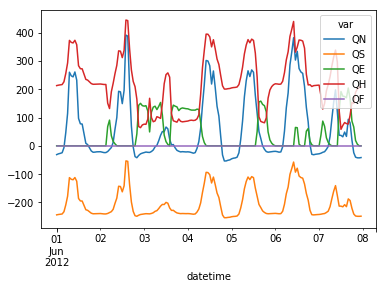

In [15]:
df_output_suews_rsmp.loc[
    '2012 6 1':'2012 6 7',
    ['QN','QS','QE','QH','QF']].plot()

The resampled output can be outputed for a smaller file.

In [16]:
df_output_suews_rsmp.to_csv('suews_1h.txt',
                            sep='\t',
                            float_format='%8.2f',
                            na_rep=-999)

For a justified format, we use the `to_string` for better format controlling and write the formatted string out to a file.

In [17]:
str_out=df_output_suews_rsmp.to_string(
    float_format='%8.2f',
    na_rep='-999',
    justify='right')
with open('suews_sample.txt','w') as file_out:
    print(str_out,file=file_out)